<a href="https://colab.research.google.com/github/Muh4gus/CF-Fuzzylogic/blob/main/CF%26Fuzzy_logic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Di sini saya menambahkan gejala
1. mual
2. muntah
3. diare
4. nyeri perut

In [2]:
gejala_user = {
    "demam": 0.2,
    "batuk": 0.5,
    "sakit_tenggorokan": 0.6,
    "mual": 0.4,
    "muntah": 0.5,
    "diare": 0.6,
    "nyeri_perut": 0.5
}

pengetahuan = {
    "flu": {
        "demam": 0.8,
        "batuk": 0.7,
        "sakit_tenggorokan": 0.6,
        "mual": 0.5,
        "muntah": 0.4,
        "diare": 0.5,
        "nyeri_perut": 0.6
    }
}

def hitung_cf(gejala_user, pengetahuan_pakar):
    cf_total = 0
    first = True
    for gejala, cf_user in gejala_user.items():
        if gejala in pengetahuan_pakar:
            cf_pakar = pengetahuan_pakar[gejala]
            cf = cf_user * cf_pakar
            if first:
                cf_total = cf
                first = False
            else:
                cf_total = cf_total + cf * (1 - cf_total)
    return cf_total

cf_flu = hitung_cf(gejala_user, pengetahuan["flu"])
print(f"CF diagnosis Flu: {cf_flu:.2f}")


CF diagnosis Flu: 0.89


In [3]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.1 MB/s eta 0:00:00


Di sini saya memodifikasi program pengatur kecepatan kipas AC berbasis logika fuzzy dengan beberapa perubahan agar berbeda dari versi sebelumnya dan lebih relevan terhadap variasi kondisi suhu dan kelembaban.

✅ 1. Modifikasi Variabel Masukan
Saya mengubah rentang nilai pada variabel temperature dari awalnya 15–40 derajat Celsius menjadi 10–45 derajat Celsius, sehingga dapat mencakup kondisi suhu yang lebih ekstrem, seperti daerah yang sangat dingin atau sangat panas.

Begitu juga pada variabel humidity (kelembaban), rentangnya saya ubah dari 20–100% menjadi 10–90%, agar dapat mengakomodasi kondisi lingkungan dengan kelembaban yang sangat rendah seperti di ruangan ber-AC maupun kelembaban tinggi seperti di musim hujan.

 2. Perubahan Label Kategori (Fuzzy Sets)
Saya juga mengganti nama-nama kategori pada masing-masing variabel untuk memberi nuansa baru:

- Temperature diubah dari dingin, nyaman, panas menjadi:

sejuk, normal, dan gerah

- Humidity diubah dari kering, normal, lembab menjadi:

rendah, sedang, dan tinggi

- Fan speed diubah dari mati, rendah, sedang, tinggi, maksimal menjadi:

off, pelan, standar, cepat, super

 3. Pembuatan Aturan (Rules) Baru
Saya menyusun ulang aturan (rule base) sebanyak 9 aturan dengan kombinasi kondisi suhu dan kelembaban yang baru. Setiap kombinasi menghasilkan output kecepatan kipas yang disesuaikan. Misalnya:

- Jika suhu gerah dan kelembaban tinggi, maka kecepatan kipas diatur super.

- Jika suhu sejuk dan kelembaban rendah, maka kipas akan dalam kondisi off.

Ini bertujuan agar kipas tidak boros energi dan bisa bekerja lebih optimal sesuai kenyamanan pengguna.

4. Nilai Input yang Diujikan
Pada bagian akhir simulasi, saya menguji sistem dengan input temperatur 30°C dan kelembaban 85%. Hasilnya menunjukkan bahwa kecepatan kipas AC berada di kisaran tinggi (kategori "super"), karena kombinasi ini menggambarkan situasi ruangan yang panas dan lembab, yang tentu membutuhkan pendinginan maksimal.

Untuk suhu 30°C dan kelembaban 85%, kecepatan kipas AC: 75.00%


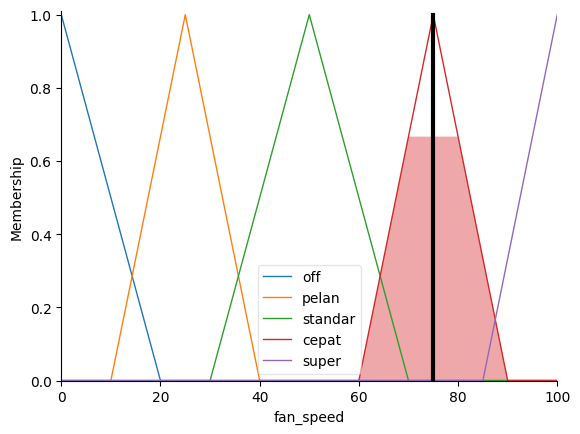

In [5]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Variabel input dan output
temperature = ctrl.Antecedent(np.arange(10, 46, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(10, 91, 1), 'humidity')
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')

# Fungsi keanggotaan untuk temperatur
temperature['sejuk'] = fuzz.trapmf(temperature.universe, [10, 10, 18, 24])
temperature['normal'] = fuzz.trimf(temperature.universe, [22, 28, 34])
temperature['gerah'] = fuzz.trapmf(temperature.universe, [30, 36, 45, 45])

# Fungsi keanggotaan untuk kelembaban
humidity['rendah'] = fuzz.trapmf(humidity.universe, [10, 10, 25, 40])
humidity['sedang'] = fuzz.trimf(humidity.universe, [35, 50, 65])
humidity['tinggi'] = fuzz.trapmf(humidity.universe, [60, 75, 90, 90])

# Fungsi keanggotaan untuk fan speed
fan_speed['off'] = fuzz.trimf(fan_speed.universe, [0, 0, 20])
fan_speed['pelan'] = fuzz.trimf(fan_speed.universe, [10, 25, 40])
fan_speed['standar'] = fuzz.trimf(fan_speed.universe, [30, 50, 70])
fan_speed['cepat'] = fuzz.trimf(fan_speed.universe, [60, 75, 90])
fan_speed['super'] = fuzz.trimf(fan_speed.universe, [85, 100, 100])

# Rules baru
rule1 = ctrl.Rule(temperature['sejuk'] & humidity['rendah'], fan_speed['off'])
rule2 = ctrl.Rule(temperature['sejuk'] & humidity['sedang'], fan_speed['pelan'])
rule3 = ctrl.Rule(temperature['sejuk'] & humidity['tinggi'], fan_speed['standar'])

rule4 = ctrl.Rule(temperature['normal'] & humidity['rendah'], fan_speed['pelan'])
rule5 = ctrl.Rule(temperature['normal'] & humidity['sedang'], fan_speed['standar'])
rule6 = ctrl.Rule(temperature['normal'] & humidity['tinggi'], fan_speed['cepat'])

rule7 = ctrl.Rule(temperature['gerah'] & humidity['rendah'], fan_speed['cepat'])
rule8 = ctrl.Rule(temperature['gerah'] & humidity['sedang'], fan_speed['super'])
rule9 = ctrl.Rule(temperature['gerah'] & humidity['tinggi'], fan_speed['super'])

# Bangun sistem kontrol dan simulasi
ac_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
ac = ctrl.ControlSystemSimulation(ac_ctrl)

# Input yang baru
ac.input['temperature'] = 30
ac.input['humidity'] = 85

ac.compute()
print(f"Untuk suhu 30°C dan kelembaban 85%, kecepatan kipas AC: {ac.output['fan_speed']:.2f}%")

# Visualisasi
fan_speed.view(sim=ac)
plt.show()
